In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Final_Statistics_Summary.csv')

print("Πληροφορίες DataFrame:")
print(df.info())
print("\nΠρώτες 5 γραμμές:")
print(df.head())



Πληροφορίες DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date Range                          484 non-null    object 
 1   Algorithm                           484 non-null    object 
 2   Subfolder                           484 non-null    object 
 3   CSV File                            484 non-null    object 
 4   By Type                             484 non-null    object 
 5   Buy Trade Count                     484 non-null    int64  
 6   Strong Buy Trade Count              484 non-null    int64  
 7   Total Trades                        484 non-null    int64  
 8   Buy Win Rate (%)                    484 non-null    float64
 9   Strong Buy Win Rate (%)             484 non-null    float64
 10  Overall Win Rate (%)                484 non-null    float64
 11  Total Profit Buy (%)  

In [3]:
print("\nΑπουσιάζουσες τιμές ανά στήλη:")
print(df.isnull().sum())



Απουσιάζουσες τιμές ανά στήλη:
Date Range                            0
Algorithm                             0
Subfolder                             0
CSV File                              0
By Type                               0
Buy Trade Count                       0
Strong Buy Trade Count                0
Total Trades                          0
Buy Win Rate (%)                      0
Strong Buy Win Rate (%)               0
Overall Win Rate (%)                  0
Total Profit Buy (%)                  0
Total Profit Strong Buy (%)           0
Avg Profit Buy (%)                    0
Avg Profit Strong Buy (%)             0
Max Profit Buy (%)                    0
Min Profit Buy (%)                    0
Max Profit Strong Buy (%)             0
Min Profit Strong Buy (%)             0
Mean Buy                              0
Volatility Buy                        0
Relative Volatility Buy (%)           0
Mean Strong Buy                       0
Volatility Strong Buy                 0
Relative

In [4]:
print("\nΒασικά στατιστικά:")
print(df.describe())


Βασικά στατιστικά:
       Buy Trade Count  Strong Buy Trade Count  Total Trades  \
count       484.000000              484.000000    484.000000   
mean          6.177686                2.101240      8.278926   
std           4.684391                4.844591      7.550704   
min           0.000000                0.000000      0.000000   
25%           2.000000                0.000000      2.750000   
50%           5.000000                0.000000      6.000000   
75%           9.000000                0.000000     11.000000   
max          38.000000               40.000000     78.000000   

       Buy Win Rate (%)  Strong Buy Win Rate (%)  Overall Win Rate (%)  \
count        484.000000               484.000000            484.000000   
mean          41.942539                 6.778372             41.930465   
std           30.185822                15.896056             29.617880   
min            0.000000                 0.000000              0.000000   
25%           22.023810          

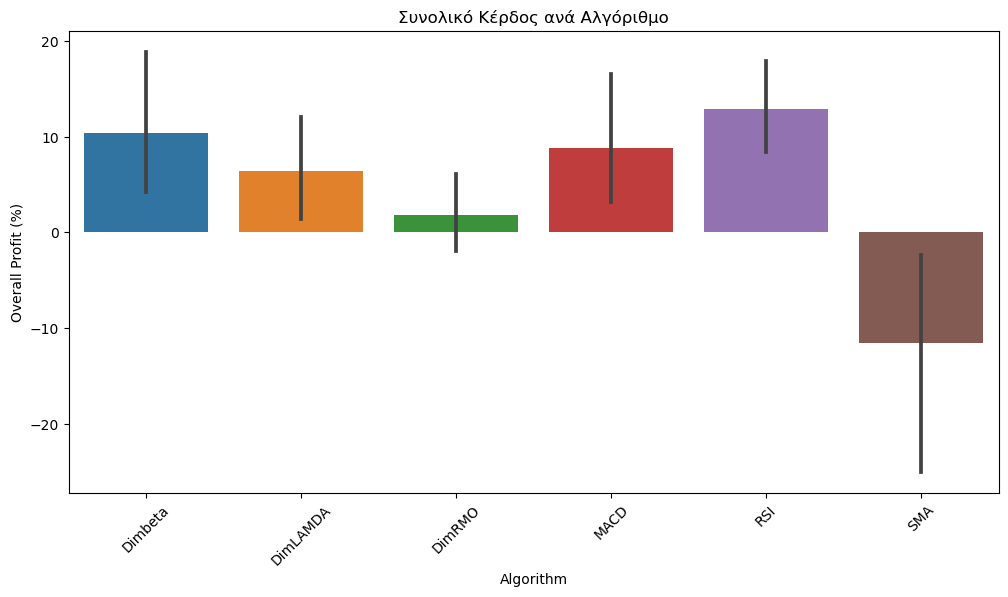

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Overall Profit (%)', data=df)
plt.title('Συνολικό Κέρδος ανά Αλγόριθμο')
plt.xticks(rotation=45)
plt.show()

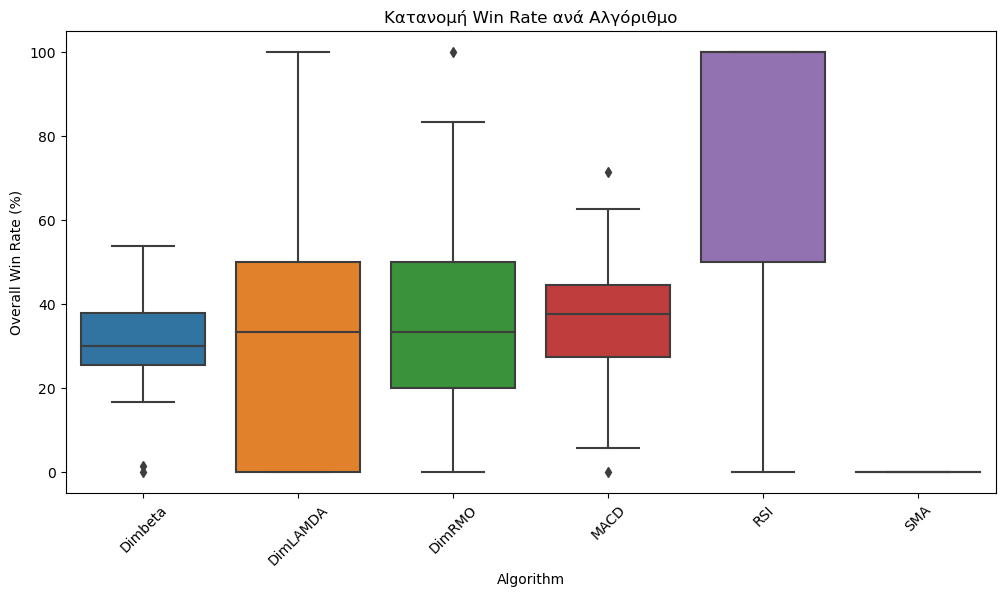

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Algorithm', y='Overall Win Rate (%)', data=df)
plt.title('Κατανομή Win Rate ανά Αλγόριθμο')
plt.xticks(rotation=45)
plt.show()

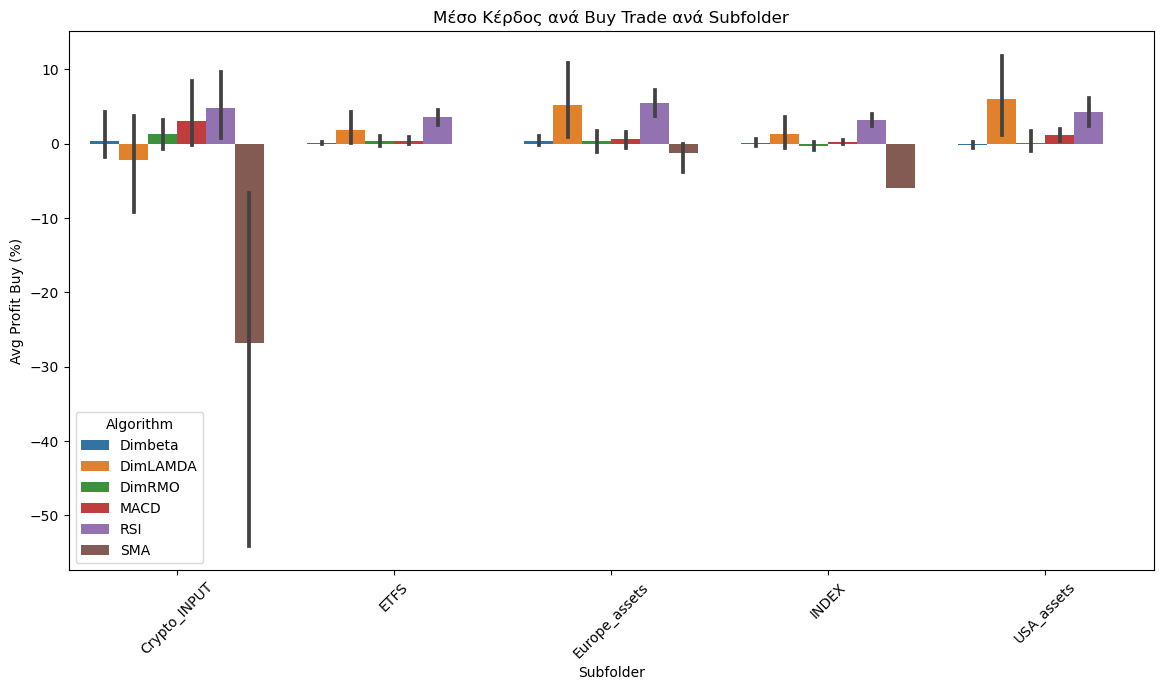

In [7]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Subfolder', y='Avg Profit Buy (%)', hue='Algorithm', data=df)
plt.title('Μέσο Κέρδος ανά Buy Trade ανά Subfolder')
plt.xticks(rotation=45)
plt.show()


In [8]:
import pandas as pd

profit_stats = df.groupby(['Subfolder', 'Algorithm'])['Avg Profit Buy (%)'].agg(['count', 'mean', 'median', 'max', 'min', 'std'])

profit_stats = profit_stats.round(2)

print(profit_stats)


                         count   mean  median    max    min    std
Subfolder     Algorithm                                           
Crypto_INPUT  DimLAMDA      15  -2.21   -0.17  24.79 -40.42  12.83
              DimRMO        15   1.26    2.13   9.10  -5.28   3.99
              Dimbeta       15   0.40   -0.89  25.21  -3.78   6.98
              MACD          15   3.08    0.73  35.93  -3.59   9.44
              RSI           15   4.81    4.13  27.66  -7.52   9.16
              SMA            6 -26.82  -17.81   0.00 -85.60  32.41
ETFS          DimLAMDA      15   1.83    0.00  15.24  -2.44   4.28
              DimRMO        15   0.36   -0.09   3.58  -1.04   1.41
              Dimbeta       15   0.06    0.09   0.83  -0.40   0.33
              MACD          15   0.37    0.02   2.62  -0.52   0.91
              RSI           15   3.53    3.08   8.48   0.89   2.05
Europe_assets DimLAMDA      23   5.18    0.73  50.45  -3.24  12.38
              DimRMO        24   0.35   -0.02   7.43 -10.86   

In [9]:
algo_groups = df.groupby('Algorithm')

In [10]:
metrics = ['Overall Profit (%)', 'Overall Win Rate (%)', 'Total Trades']
summary = algo_groups[metrics].mean()
print("\nΣύνοψη Μετρικών ανά Αλγόριθμο:")
print(summary)


Σύνοψη Μετρικών ανά Αλγόριθμο:
           Overall Profit (%)  Overall Win Rate (%)  Total Trades
Algorithm                                                        
DimLAMDA             6.403878             36.367725      2.466667
DimRMO               1.845719             34.068612      6.904255
Dimbeta             10.410465             31.682300     19.694737
MACD                 8.816388             36.833896     10.568421
RSI                 12.943267             76.944862      2.684211
SMA                -11.554818              0.000000      0.400000


C:\Users\vagel\AppData\Local\Temp\ipykernel_9564\204348973.py:59: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


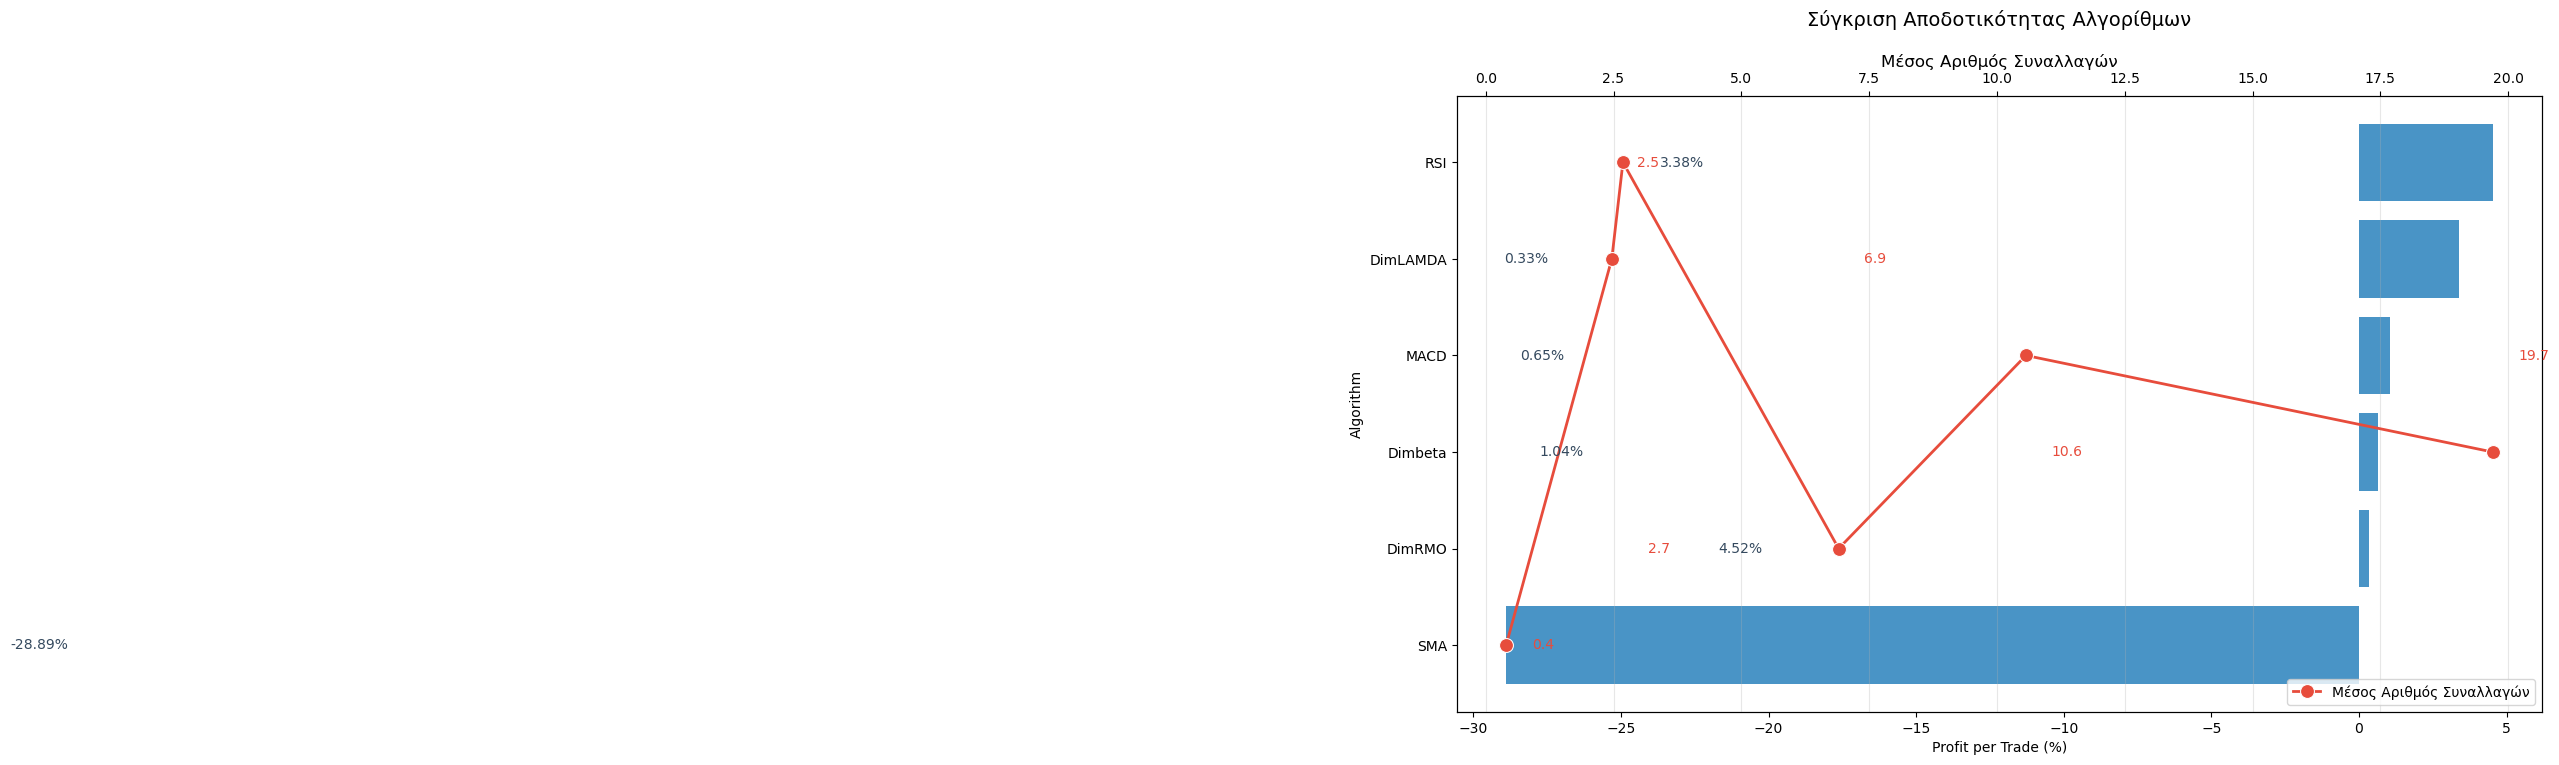

In [11]:
df['Profit per Trade (%)'] = df['Overall Profit (%)'] / df['Total Trades']

avg_df = df.groupby('Algorithm').agg({
    'Profit per Trade (%)': 'mean',
    'Total Trades': 'mean'
}).reset_index()

avg_df = avg_df.sort_values('Profit per Trade (%)', ascending=False)

plt.figure(figsize=(14, 8))

sns.barplot(
    x='Profit per Trade (%)', 
    y='Algorithm', 
    data=avg_df, 
    color='#3498db', 
    label='Μέσο Κέρδος ανά Trade (%)'
)

ax2 = plt.gca().twiny()  
sns.lineplot(
    x='Total Trades', 
    y='Algorithm', 
    data=avg_df, 
    color='#e74c3c', 
    marker='o', 
    markersize=10, 
    linewidth=2, 
    label='Μέσος Αριθμός Συναλλαγών',
    ax=ax2
)

plt.title('Σύγκριση Αποδοτικότητας Αλγορίθμων', pad=20, fontsize=14)
plt.xlabel('Μέσο Κέρδος ανά Trade (%)', fontsize=12)
plt.ylabel('Αλγόριθμος', fontsize=12)
ax2.set_xlabel('Μέσος Αριθμός Συναλλαγών', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for index, row in avg_df.iterrows():
    plt.text(
        row['Profit per Trade (%)'] + 0.02, 
        index, 
        f"{row['Profit per Trade (%)']:.2f}%",
        va='center',
        fontsize=10,
        color='#34495e'
    )
    ax2.text(
        row['Total Trades'] + 0.5, 
        index, 
        f"{row['Total Trades']:.1f}",
        va='center',
        fontsize=10,
        color='#e74c3c'
    )

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


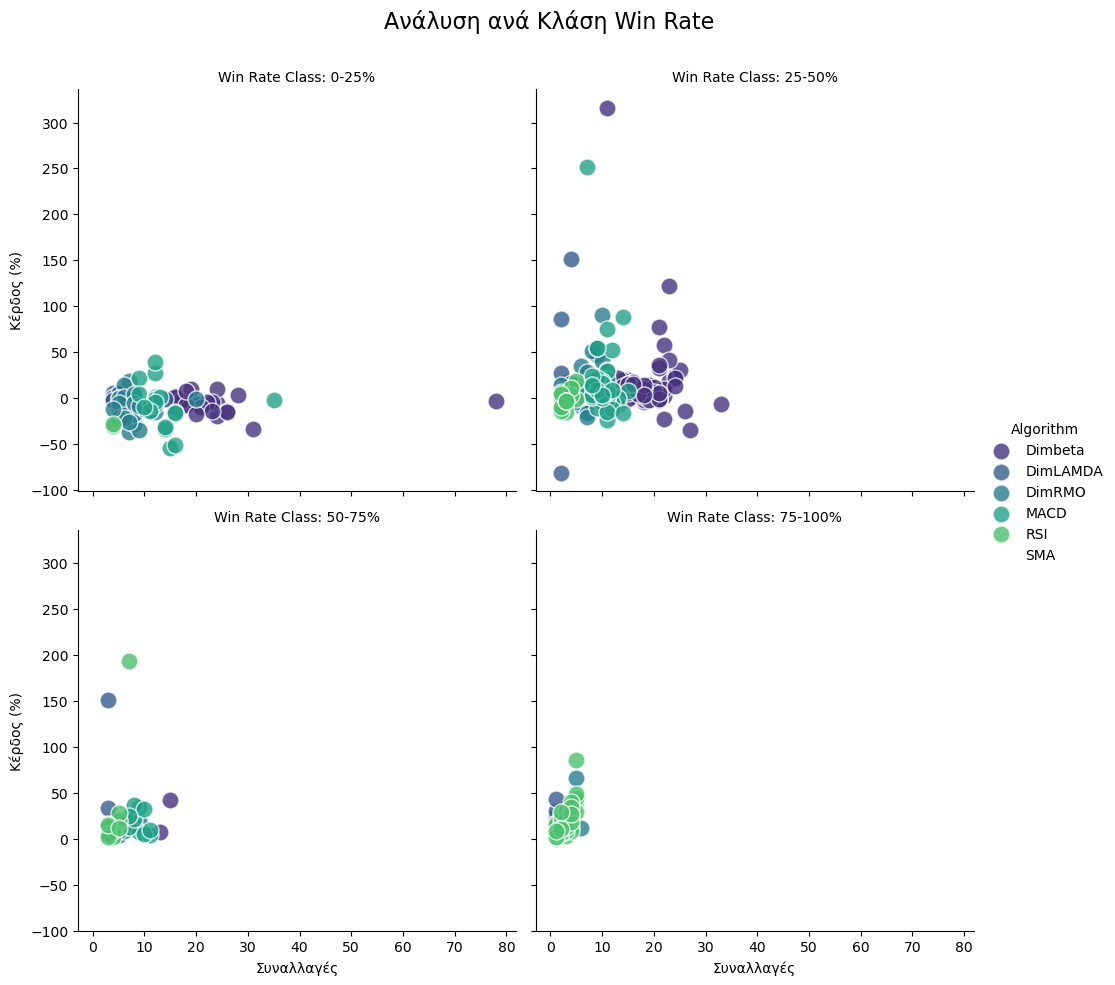

In [12]:
df['Win Rate Class'] = pd.cut(
    df['Overall Win Rate (%)'],
    bins=[0, 25, 50, 75, 100],
    labels=['0-25%', '25-50%', '50-75%', '75-100%']
)

g = sns.FacetGrid(
    df, 
    col='Win Rate Class', 
    hue='Algorithm',
    col_wrap=2, 
    height=5,
    palette='viridis'
)

g.map(sns.scatterplot, 'Total Trades', 'Overall Profit (%)', s=150, alpha=0.8)
g.add_legend()
g.set_titles("Win Rate Class: {col_name}")
g.set_axis_labels("Συναλλαγές", "Κέρδος (%)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Ανάλυση ανά Κλάση Win Rate', fontsize=16)
plt.show()